In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
plt.rcParams["font.size"] = 16

In [3]:
df = pd.read_csv(os.path.join('data', 'LifeExpectancyData.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Text(0.5, 0.98, "Figure 1: Comparison of Schooling, Income Composition and GDP's effect on life expectancy")

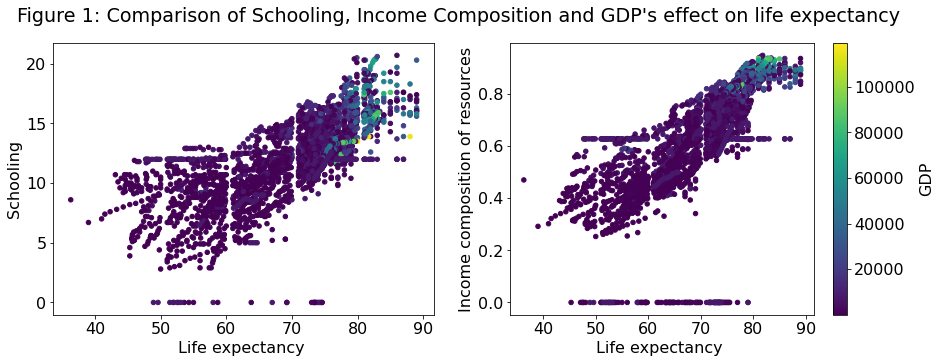

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
df.plot.scatter(x="Life expectancy ", y = "Schooling", c="GDP", cmap="viridis", ax=ax[0], colorbar=False)
df.plot.scatter(x="Life expectancy ", y = "Income composition of resources", c="GDP", cmap="viridis", ax=ax[1])
fig.suptitle("Figure 1: Comparison of Schooling, Income Composition and GDP's effect on life expectancy")

In [7]:
numeric_cols = list(df.columns)[1:]
numeric_cols.remove('Status')
numeric_cols

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [8]:
ss = StandardScaler()
ss.fit(df[numeric_cols])

StandardScaler()

In [9]:
scaled=[]
not_scaled=[]
for num in range(1, len(numeric_cols)+1):
    pca_1 = PCA(n_components = num)
    pca_2 = PCA(n_components = num)
    vals_1 = pca_1.fit_transform(df[numeric_cols])
    vals_2 = pca_2.fit_transform(ss.transform(df[numeric_cols]))
    not_scaled.append(sum(pca_1.explained_variance_ratio_))
    scaled.append(sum(pca_2.explained_variance_ratio_))

In [10]:
df_figure = pd.DataFrame(columns = ["Number of Components", "Scaled"])
df_figure["Number of Components"] = [num for num in range(1, len(numeric_cols)+1)]
df_figure = df_figure.set_index("Number of Components")
df_figure["Scaled"] = scaled
#df_figure["Not scaled"] = not_scaled

df_figure

,Scaled
Number of Components,
1,0.309527
2,0.443685
3,0.532652
4,0.602590
5,0.664979
6,0.716946
7,0.759384
8,0.799098
9,0.835898


In [11]:
np.var(scaled)*100

3.9773062496698555

Text(0.5, 1.0, 'Figure 2: Principal Component Analysis')

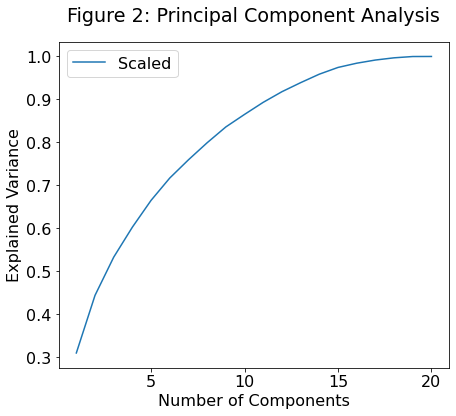

In [12]:
ax = df_figure.plot.line(figsize = (7, 6))
ax.set_ylabel("Explained Variance")
ax.set_title("Figure 2: Principal Component Analysis", pad=20)

In [13]:
train, test = train_test_split(df, random_state=0)

In [14]:
listFeatures = list(df.columns)[4:]
listFeatures

['Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [15]:
lr_pipe = Pipeline([
    ('ss', StandardScaler()),
    ("lr", LinearRegression())
])

lr = lr_pipe
lr.fit(train[listFeatures], train["Life expectancy "])
predicted = lr.predict(test[listFeatures])
test_predicted = test.copy()
test_predicted['Predicted life expectancy'] = predicted
test_predicted.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Predicted life expectancy
867,Estonia,2014,Developing,77.3,122.0,0,0.010000,2700.073050,93.000000,0,...,6.38000,93.0,0.1,19941.455320,1.314545e+06,1.9,1.9,0.860,16.5,77.198048
1780,Myanmar,2015,Developing,66.6,199.0,39,4.602861,0.000000,89.000000,6,...,5.93819,89.0,0.3,1194.591370,5.243669e+06,12.8,13.0,0.552,9.1,66.021240
621,Congo,2002,Developing,52.6,424.0,9,2.550000,0.000000,80.940461,2788,...,2.45000,41.0,7.2,7483.158469,1.275338e+07,9.3,8.9,0.488,9.5,53.315408
2715,Uganda,2014,Developing,61.5,38.0,68,0.010000,14.167702,78.000000,314,...,7.22000,78.0,3.2,719.172669,3.883334e+07,5.7,5.6,0.483,10.0,66.905909
2717,Uganda,2012,Developing,60.0,339.0,73,0.010000,92.886979,78.000000,2027,...,7.58000,78.0,4.6,647.747410,3.636796e+06,5.8,5.8,0.477,10.0,59.664263


In [16]:
print("r2 Score: ", r2_score(test["Life expectancy "], test_predicted["Predicted life expectancy"]))

r2 Score:  0.8252939733196553


In [17]:
simple_scores = cross_val_score(lr, train[listFeatures], train["Life expectancy "], cv=8)
print("r2 Score Mean: ", simple_scores.mean())

r2 Score Mean:  0.8094520164111625


In [18]:
print("Varience: ", simple_scores.var())

Varience:  0.0006814392851729489


Text(0.5, 1.0, 'Figure 3: Linear regression Coefficients')

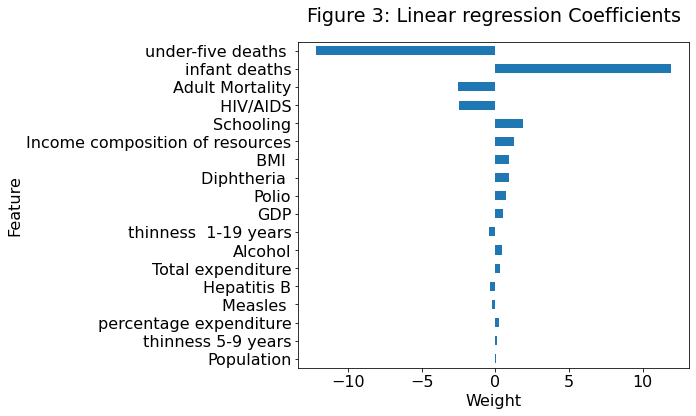

In [19]:
ax = pd.Series(lr_pipe["lr"].coef_, index=listFeatures).sort_values(key = abs).plot.barh(figsize = (7, 6))
ax.set_xlabel("Weight")
ax.set_ylabel("Feature")
ax.set_title("Figure 3: Linear regression Coefficients", pad=20)